<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Problem" data-toc-modified-id="Problem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem</a></span></li><li><span><a href="#Interest" data-toc-modified-id="Interest-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Interest</a></span></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Data-Sources" data-toc-modified-id="Data-Sources-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Sources</a></span></li><li><span><a href="#Data-Cleaning-and-Preparation" data-toc-modified-id="Data-Cleaning-and-Preparation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Cleaning and Preparation</a></span></li></ul></li><li><span><a href="#Cluster-Analysis" data-toc-modified-id="Cluster-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cluster Analysis</a></span><ul class="toc-item"><li><span><a href="#First-Clustering" data-toc-modified-id="First-Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>First Clustering</a></span></li><li><span><a href="#Second-Clustering" data-toc-modified-id="Second-Clustering-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Second Clustering</a></span></li><li><span><a href="#Further-Analysis" data-toc-modified-id="Further-Analysis-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Further Analysis</a></span></li></ul></li></ul></div>

<center> <h1> A RESTAURANT IN VENICE </h1> </center>

## Introduction

### Background

It’s is often said that __Venice, Italy__, is a one-of-a-kind city. Far from being a futile cliché this sentence, is, indeed, grounded in reality, and that isn’t only due to Venice’s exceptional topography, but also to its very unique economy, which, notoriously, relies entirely on tourism. 

Hence, it goes without saying that this peculiar economy has recently suffered a dramatic contraction as a result of the current pandemic, which __drove down the island’s yearly tourism influx by 71.7%__.

However, times of crisis are often ones of __business opportunities__, and 2020 in Venice has been no exception, with historical Hotels selling for half their values - some of these sells made the international newspapers’ headlines - and a wide plethora of properties back on the market.

### Problem 

In this context, we would like to propose an analysis that will help interested investors in starting a commercial activity - specifically a __restaurant__ - in the historical island of Venice, or in the adjacent - and commercially viable - islands of Murano and Giudecca.

Specifically, we want help stakeholders identify the __most suitable neighbourhood for such investment__, considering different factors such as __population, tourism influx, and typologies of the existing activities__ in each neighbourhood. Considering the peculiar season the city is living, as well as the still uncertain estimates regarding the future of tourism industry, we aim at choosing the neighbourhood with a __balanced proportion of travellers and current residents__.


Eventually, once the most suitable candidate is selected, we will provide stakeholders with __details regarding the composition of the existing food services__ in neighbourhood, so that to enable them to choice the best type of food service to offer. 

In order to do so, we will leverage an API provided by _Foursquare_, an online platform and application that allows users to register, categorise and rate venues across the world.

Schematically, we will proceed as follows:

• __Cluster__ Venetian neighbourhoods on the basis of their __popularity across tourists__; <br>
• Select the __most popular cluster__; <br>
• __Cluster__ the remaining neighbourhoods, on the basis of the __categories of existing food services__;<br>
• Select the cluster with the __least diverse set of categories__ - so that to have the widest plethora of
investment options;<br>
• Select the __most populated neighbourhood__ - where current rent rates are rather low on average;<br>
• Provide a __visual description__ of the existing categories in the candidate neighbourhood;<br>


### Interest

The analysis that follows is aimed at both __Italian and international investors__, with a particular focus on those who lack a certain domain knowledge about the very peculiarity of Venice. Venetians and regular visitors might also be interested in such data driven description of the city and of its neighbourhood, and will likely find useful insights, which might either confirm of invalid their rule-of-the-thumb suppositions.

We start by importing the required packages. Aside from rather standard libraries (__pandas__ , __numpy__ , __matplotlib__ ), we will be also making use of the geographical visualization package __folium__ as well as of the functionalities provided by __sklearn__ - __KMeans__, specifically, as it will be constitutive of the clustering model we are going to develop. 

## Data

### Data Sources 

In order to develop our analysis, we will be leveraging __location data__ via the free access API provided by _Foursquare_. This will enable us to cluster Venice’s neighbourhoods - Venice’s main islands and the areas historically called “Sestieri” - on the basis of the typologies of venues users have reviewed over the years. Such an homogenous source of data will be integrated with a more diverse series of datasets, which will be functional to the __geocoding__ of the neighbourhood themselves, as well as to providing useful insights into features such as __population density__ and __tourism demand__.

Considering the peculiarity of the analysis, some datasets were manually assembled into tabular form, while other were web-scraped or directly downloaded by open access platforms such as _Inside Airbnb_.

The sourced data set - in order of appearance within the analysis - are the ones that follow:

• User-defined dataset listing Venice’s neighbourhoods and respective __geographical coordinates__;<br>
• User-defined dataset organising Venice’s neighbourhoods on the basis of their __population
density__;<br>
• Dataset directly downloaded from the platform Inside Aribnb, which catalogues all __Airbnb
offerings__ in the city, providing useful insights such as price per night and location information;<br>
• Data fetched via the Foursquare API, containing information about the categories of the __food
services__ offered in each Venetian neighbourhood;<br>
• Publicly available web-scraped data on __rental cost__ for commercial actives in each Venetian
neighbourhood;<br>

Finally, it is worth to mention that, when closely examined, this collection of data is flawed in some respect. Foursquare data itself, for instance, is sometimes too granular to be throughly functional, as it seldom results in a series of noisy, redundant entries - e.g. “Veneto Restaurant”, “Italian Restaurant”, “Mediterranean”, and “Local Restaurant” all labelled under different categories.

Nevertheless, it cannot underestimated how the aforementioned collection allows non-enterprise users to build an accurate and commercial viable analysis as the one that follows.

### Data Cleaning and Preparation

We start by importing the required packages. Aside from rather standard libraries (__pandas__ , __numpy__ , __matplotlib__ ), we will be also making use of the geographical visualization package __folium__ as well as of the functionalities provided by __sklearn__ - __KMeans__, specifically, as it will be constitutive of the clustering model we are going to develop. 

In [1]:
#Import all required packages 

#Pandas
import pandas as pd

#Numpy
import numpy as np

#Seaborn
import seaborn as sns

#Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
plt.style.use('seaborn-muted')
%matplotlib inline

#Set dpi parameters
plt.rcParams['figure.dpi']= 300

#KMeans
from sklearn.cluster import KMeans

#Folium
import folium 

#Display
from IPython.display import display

#Requests
import requests

We proceed by importing the first dataset, namely a user-defined table of __Venice neighborhoods' coordinates__, a by converting it into DataFrame format. 

In [2]:
#Define url
url = 'https://raw.githubusercontent.com/j-trab/Coursera_Capstone/main/Venice-Zip.csv'

In [3]:
#Read csv file from github repository
Venezia_df = pd.read_csv(url, sep=';')

In [4]:
#Rename Df columns for convenience
Venice_df = Venezia_df.rename(columns={'Neighbourhood / Sestiere': 'Neighborhood', 'Zip / Cap': 'Postal_code'})

In [5]:
#Rename Sant'Elena
Venice_df.iloc[4,0] = "Sant'Elena"

#Visualize DataFrame in its entirety in alphabetical order
Venice_df.sort_values(by='Neighborhood', inplace=True)

Venice_df.reset_index(inplace=True, drop=True)

Venice_df

,Neighborhood,Postal_code,Latitude,Longitude
0,Burano,30142,45.48534,12.41756
1,Cannaregio,30121,45.44370,12.32570
2,Castello,30122,45.43468,12.35091
3,Dorsoduro,30123,45.43313,12.31903
4,Giudecca,30133,45.42477,12.32906
5,Murano,30141,45.45550,12.35110
6,Sacca Fisola,30133,45.42698,12.31478
7,San Marco,30124,45.43483,12.33402
8,San Polo,30125,45.43795,12.32933
9,Sant'Elena,30132,45.42872,12.36298


Then, we define Venice's main Island central __coordinates__.

In [6]:
#Define Venice's coordinates
address = 'Venice, IT'
latitude = 45.438759
longitude = 12.327145

print('The geograpical coordinate of Venice, Italy are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Venice, Italy are 45.438759, 12.327145.


And produce a geographical representation of the __lagoon's main islands__, with their respective __neighborhood superimposed on top__.

In [7]:
#Create folium map object
Venice_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [8]:
#Create and visualize Venice neighborhoods' map
for lat, lng, neighborhood in zip(Venice_df['Latitude'], Venice_df['Longitude'], Venice_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Venice_map)  
    
Venice_map

As a result of this visualization, we decide to __drop__ the neighborhood including the island of __Burano__, in that presumably too far away from Venice's city center - a quick Google Maps search confirms that to reach Burano by public transport from the center of Venice would take no less than one hour. 

In [9]:
#Drop Burano entry from DataFrame
Venice_df.drop(0, axis=0, inplace=True)

In [10]:
Venice_df.reset_index(inplace=True, drop=True)

At this stage of the analysis, we want to provide stakeholders with a preliminary and yet very effective distinction. In fact, will __cluster Venice's neighborhoods on the basis of the influx of tourist/visitors__ to each of them, so that potential investors can decide on their primary target customers from the start.

In order to do so, we will start by loading and cleaning data regarding the __population__ living in each neighborhood.

In [11]:
#Read csv into Df
Venice_population = pd.read_csv('https://raw.githubusercontent.com/j-trab/Coursera_Capstone/main/Venice-population.csv', sep=';')

In [12]:
#Visualize Df
Venice_population

,Neighbourhood,Population
0,Burano,2270
1,Giudecca,4481
2,Murano,4338
3,Sacca Fisola,1452
4,Sant’Elena,1861
5,Cannaregio,15662
6,Castello,11642
7,Dorsoduro,6429
8,San Marco,3788
9,San Polo,4628


In [13]:
#Drop Burano entry
Venice_population.drop(0, axis=0, inplace=True)

Venice_population.reset_index(drop=True, inplace=True)

In [14]:
#Rename Sant' Elena entry
Venice_population.iloc[3,0] = "Sant'Elena"

#Rename Neighbourhood for consistency
Venice_population.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)

In [15]:
#Sort Neighbourhood in alphabetical order
Venice_population.sort_values(by='Neighborhood', inplace=True)

Venice_population.reset_index(inplace=True, drop=True)

In [16]:
#Display Df
Venice_population

,Neighborhood,Population
0,Cannaregio,15662
1,Castello,11642
2,Dorsoduro,6429
3,Giudecca,4481
4,Murano,4338
5,Sacca Fisola,1452
6,San Marco,3788
7,San Polo,4628
8,Sant'Elena,1861
9,Santa Croce,4996


Now, limited by the open-access resources at our disposal, we are not able to obtain any specif data about __tourism influx per neighborhood__. However, within a certain range of accuracy, we will be able to infer them from __data regarding the _Airbnb_ listings__ in the city, which is publicly available on tabular form via the platform _Inside Airbnb_.

First we load the data and clean such data.

In [17]:
#Define url
url_listings = 'https://raw.githubusercontent.com/j-trab/Coursera_Capstone/main/Venice-listings.csv'

In [18]:
#Read csv into DataFrame
listings = pd.read_csv(url_listings)

In [19]:
#Get Df dimensions
listings.shape

(7951, 16)

In [20]:
#Drop columns we don't need
listings.drop(columns=['host_id', 'host_name', 'neighbourhood_group','minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count'], inplace=True)

In [21]:
#Filter only neighbourhoods our analysis focuses on
new_listings = listings[listings['neighbourhood'].
                     isin(['Cannaregio', 'Castello', 'Dorsoduro', 'Giudecca', 'Murano',
       'Sacca Fisola', 'San Marco', 'San Polo', 'Santa Croce', "Sant'Elena"])]

In [22]:
#Rename column for consistency
new_listings = new_listings.rename(columns={'neighbourhood': 'Neighborhood'})

Once we are done setting up our _Airbnb_ listings DataFrame we obtain the __mean listing price for each neighborhood__. Presumably, this will be a rather descriptive feature, our assumption being that the higher the price guests are keen to pay for their accommodation the more central and exclusive the neighborhood - and, as a consequence the higher the price costumer of restaurant would be also keen to pay. 

In [23]:
#Derive mean listing price for each neighborhood
listings_mean_price = new_listings.groupby('Neighborhood').price.mean().to_frame().reset_index()['price']

In [24]:
listings_mean_price

0    142.097938
1    140.082884
2    157.510779
3    157.719424
4     95.609756
5     95.000000
6    183.387097
7    148.671275
8    105.549020
9    139.203020
Name: price, dtype: float64

We the insert this feature in Venice_population Df for later use.

In [25]:
#Create Mean price column
Venice_population['Mean price'] = listings_mean_price

In [26]:
#Visualize Df
Venice_population

,Neighborhood,Population,Mean price
0,Cannaregio,15662,142.097938
1,Castello,11642,140.082884
2,Dorsoduro,6429,157.510779
3,Giudecca,4481,157.719424
4,Murano,4338,95.609756
5,Sacca Fisola,1452,95.000000
6,San Marco,3788,183.387097
7,San Polo,4628,148.671275
8,Sant'Elena,1861,105.549020
9,Santa Croce,4996,139.203020


Population figures and tourists/ guests' demand for _Airbnb_ listings are pretty much mutually exclusive. Accordingly, our assumption is that the __ratio between the number of listings and the number of residents in each neighborhood__ will be an effective descriptor of the popularity of each given neighborhood among tourists - with respect to its size.

We then derive this figure from the Venice_population Df and the newly defined new_listings Df.

We first define the __number of listings for each neighborhood__.

In [27]:
#Obtain number of listings per neighborhood
n_listings = new_listings.groupby('Neighborhood').size().to_frame().reset_index()[0]

Then we insert it into the Venice_population Df.

In [28]:
#Insert number of listings into Venice_population Df
Venice_population.insert(2, 'Number of listings', n_listings)

Finally, we create obtain the aforementioned ratio, and store it in a column name residents_per_listing.

In [29]:
#Get ratio between number of residents and number of listings in each neighborhood
residents_per_listing = Venice_population['Population'] / Venice_population['Number of listings']

In [30]:
Venice_population['Residents per listing'] = residents_per_listing

In [31]:
Venice_population

,Neighborhood,Population,Number of listings,Mean price,Residents per listing
0,Cannaregio,15662,1552,142.097938,10.091495
1,Castello,11642,1484,140.082884,7.845013
2,Dorsoduro,6429,603,157.510779,10.661692
3,Giudecca,4481,139,157.719424,32.237410
4,Murano,4338,82,95.609756,52.902439
5,Sacca Fisola,1452,3,95.000000,484.000000
6,San Marco,3788,961,183.387097,3.941727
7,San Polo,4628,651,148.671275,7.109063
8,Sant'Elena,1861,51,105.549020,36.490196
9,Santa Croce,4996,596,139.203020,8.382550


## Cluster Analysis 

### First Clustering 

Now, we are ready to __cluster Venice's neighborhood on the basis of their popularity among visitors to the city__. We will implement the __KMeans__ algorithm to do so. 

Additionally, we won't be referring to a predetermined number of clusters. Rather, we will decide the number of clusters using the widely adopted __Elbow Method__ and __Silhouette Coefficients Method__ in a complementary manner.

First we preprocess our data by scaling them.

In [32]:
#Import package
from sklearn.preprocessing import MinMaxScaler

#Define feature space 
X = Venice_population.values[:,3:]

#Standardize values 
X = MinMaxScaler().fit_transform(X)

In [33]:
#Define method parameters - setting seed for reproducibility
kmeans_params = {
    "init": "k-means++",
    "n_init": 300,
    "max_iter": 1000,
    "random_state": 42,
}

#Define empty list to hold the SSE values for each k
sse = []

#Round KMeans iterations across the defined range of k number of clusters
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

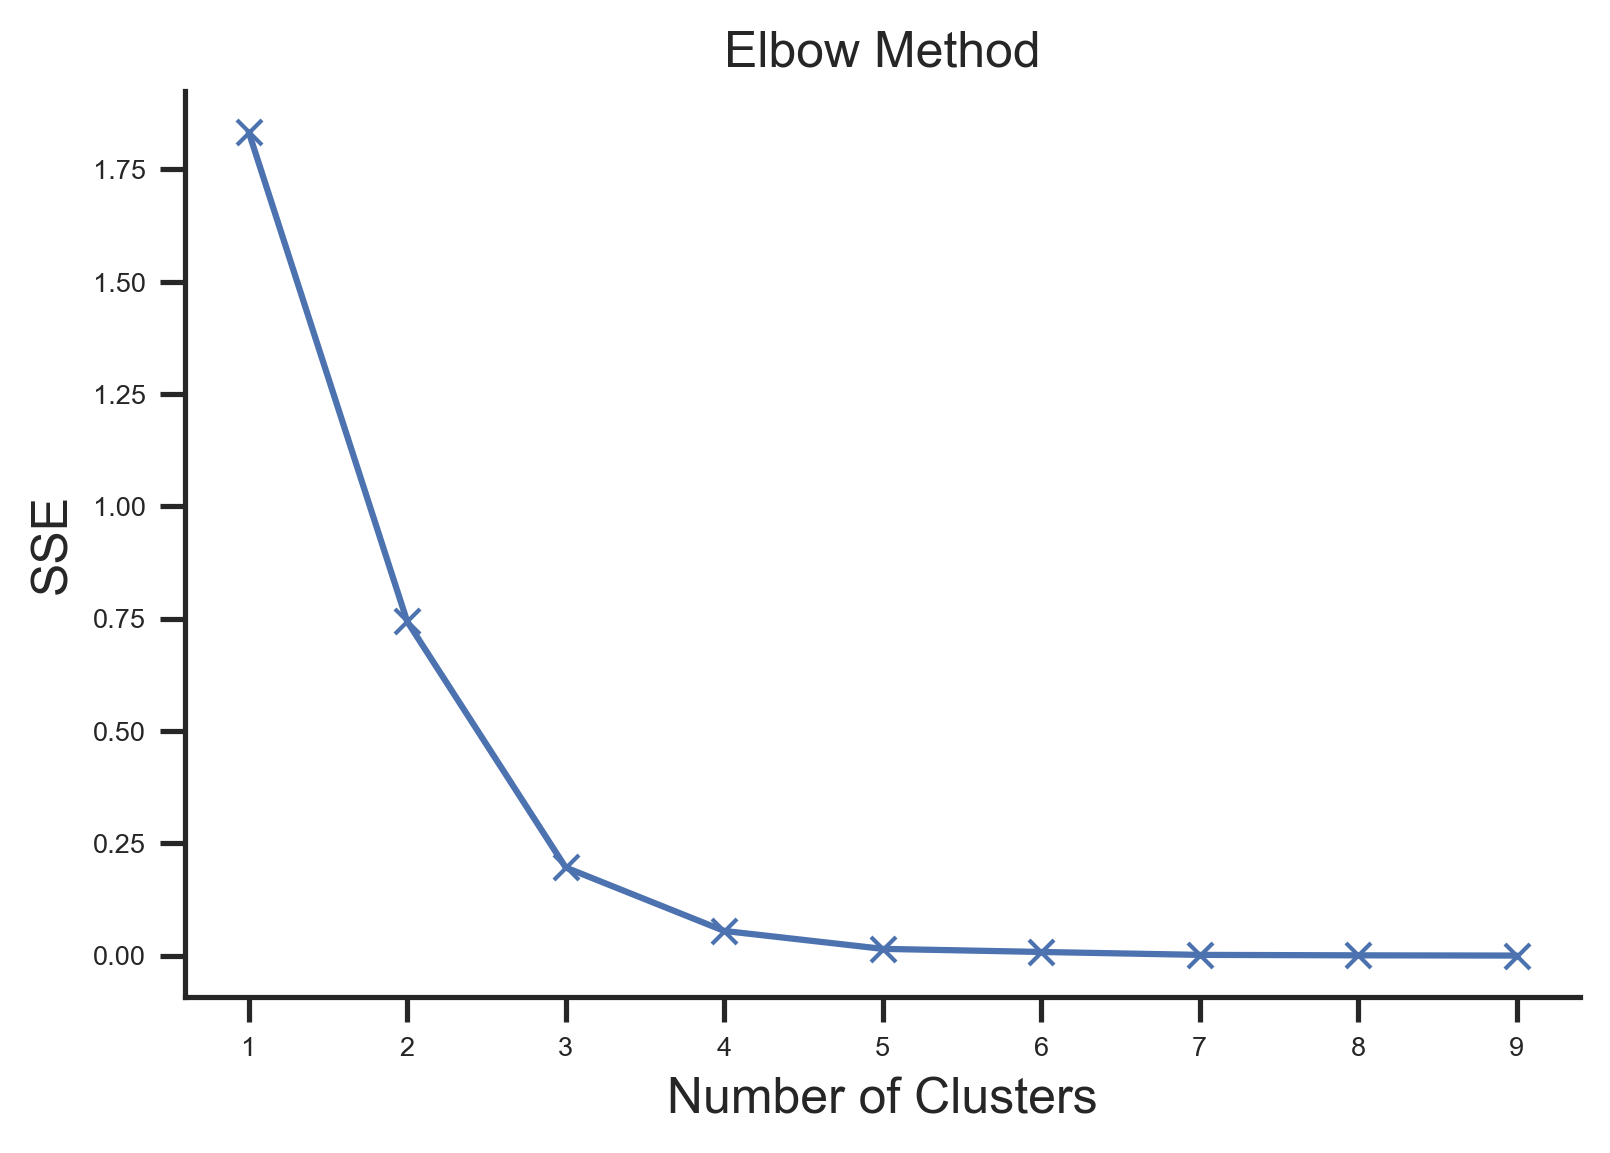

In [34]:
#Plot to identify the elbow for the SSE vs k curve

sns.set_theme(style="ticks", color_codes=True)

plt.plot(range(1, 10), sse, '-bx')
plt.title('Elbow Method')
plt.xticks(range(1, 10), size=6.5)
plt.yticks(size=6.5)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
sns.despine()
plt.show()

In [35]:
from sklearn.metrics import silhouette_score
#Empty list to hold the silhouette coefficients for each k
silhouette_coefficients = []

#Loop for Kmeans for each K and obtain respective silhoutte coefficients
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

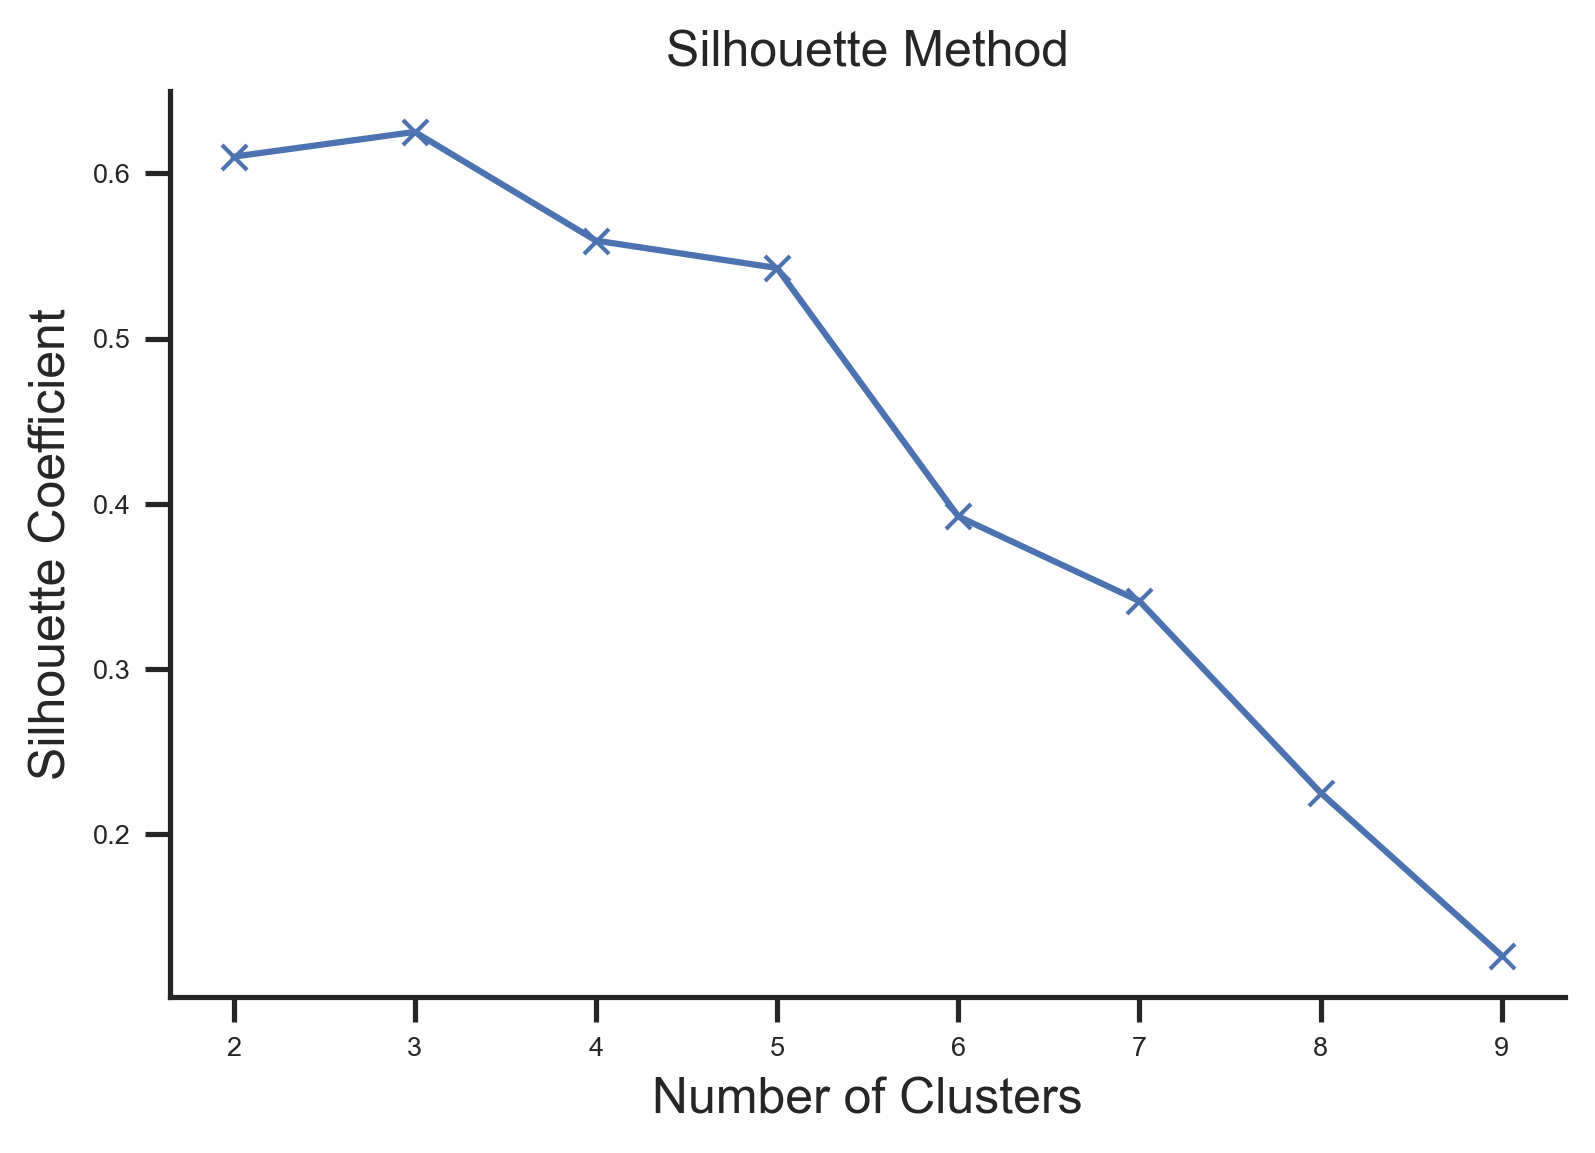

In [36]:
#Plot to identify the number of cluster with highest silhouhette coefficients
sns.set_theme(style="ticks", color_codes=True)

plt.plot(range(2, 10), silhouette_coefficients,'-bx')
plt.xticks(range(2, 10), size=6.5)
plt.yticks(size=6.5)
plt.title('Silhouette Method')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
sns.despine()
plt.show()

Our first plot identified and Elbow (a point after which the SSE decrease becomes marginal) in __K=3__, and this was conformed by the graph plotting the Silhouette coefficients. 

Accordingly, __the optimal number of clusters is 3__.

Thus, we re-run KMeans using 3 as our predetermined number of cluster.

In [37]:
#Define parameters
kmeans_params = {
    "init": "k-means++",
    "n_init": 300,
    "max_iter": 1000,
    "random_state": 42,
}

#Specify number of clusters
kmeans = KMeans(n_clusters=3, **kmeans_params)

#Fit model
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=3, n_init=300, random_state=42)

And obtain the labels for each neighborhood, which we then insert into our Venice_population Df.

In [38]:
#Obtain cluster labels
kmeans.labels_

array([0, 0, 0, 0, 2, 1, 0, 0, 2, 0], dtype=int32)

In [39]:
#Create cluster column
Venice_population.insert(1, 'Cluster', kmeans.labels_)

We display Venice's __neighborhoods with their corresponding cluster__.

In [40]:
Venice_population[['Neighborhood', 'Cluster']]

,Neighborhood,Cluster
0,Cannaregio,0
1,Castello,0
2,Dorsoduro,0
3,Giudecca,0
4,Murano,2
5,Sacca Fisola,1
6,San Marco,0
7,San Polo,0
8,Sant'Elena,2
9,Santa Croce,0


Now we are ready to analyze each cluster individually. 

First, we decide to display our __clustered neighborhoods in a map__.

In [41]:
#Sort Df by alphabetical order - to match Venice_population Df
Venice_df.sort_values(by='Neighborhood', inplace=True)

In [42]:
#Insert Cluster column
Venice_df.insert(1, 'Cluster', kmeans.labels_)

In [43]:
#Create map object
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Venice_df['Latitude'], Venice_df['Longitude'], Venice_df['Neighborhood'], Venice_df['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

From the map displayed above, we notice that, not surprisingly, __different clusters correspond to different distances from the city center__. This is likely due to the fact that central ares and neighborhoods are the most popular choices among visitors who decide to spend the night in Venice. 

Now we are going to confirm that by __exploring the characteristics which define each cluster__, namely by grouping by cluster and taking the mean of both the mean listing price (per Neighborhood) and the residents per listing ratio.

In [44]:
#Group Df by cluster and display the mean 
Venice_population_grouped = Venice_population.groupby('Cluster')[['Mean price', 'Residents per listing']].mean()

In [45]:
Venice_population_grouped

,Mean price,Residents per listing
Cluster,,
0,152.667488,11.466993
1,95.000000,484.000000
2,100.579388,44.696318


Then we create a __bar chart__ displaying the results.

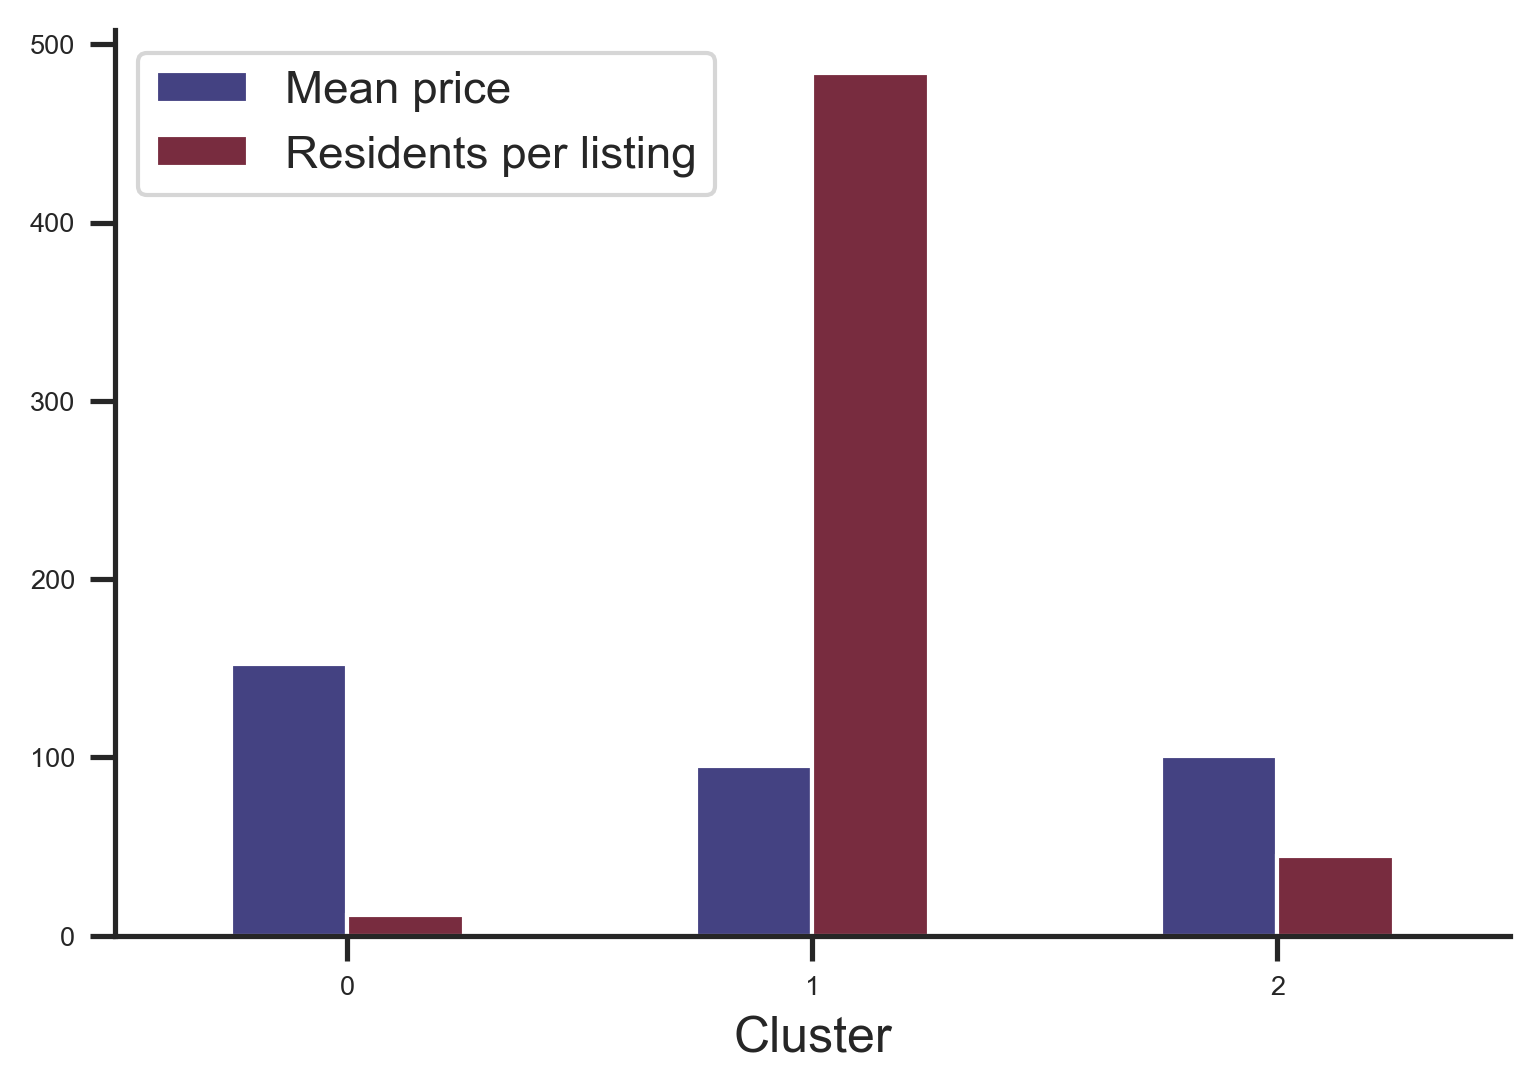

In [46]:
#Create plot with both Mean price and Residents per listing of the y axis
sns.set_palette("icefire", 2)
fig = Venice_population_grouped.plot(kind='bar', secondary_y='')
plt.xticks(size=6.5, rotation=0)
plt.yticks(size=6.5)
sns.despine()
plt.show()

From the plot displayed above we can clearly see the __composition of our clusters__.

__Cluster 0__ <br>
We can assume that the first cluster 0, which includes the neighborhood of Cannaregio, Castello, Dorsoduro, Giudecca, San Marco, San Polo, and Santa Croce, is __the one for which tourism demand is the highest__, since is the one whose neighborhood has the highest listing prices, and, by far, the one with the highest concentration of _Aribnb_ listings (namely the lowest residents per listing ratio).

__Cluster 1__ <br>
Cluster 1, including the island of Sacca Fisola only, is __by far the least popular among tourists__, since only 3 accommodations (with rather low prices on average) are listed. 

__Cluster 2__ <br>
Cluster 2, including the island of Murano and the neighborhood of Sant'Elena, is not the most popular among visitors to the city. However, as compared to Cluster 1, it still hosts a rather high amount of _Airbnb listings_ and it is probably targeted by those who are looking for __cheaper and quieter accommodations__, as compared to the congested city center.  

From the these findings, it is clear prior to opening a restaurant in each given cluster would correspond to different choice, in turn implying a different targeted audience, and accordingly to a different business model. 

From now on, especially considering the peculiar season the city is leaving due to the pandemic, we will be assuming that __stakeholder might be interested in Cluster 0__, namely the one which is usually by far the most targeted by tourists, and where - because of the aforementioned current drop in tourism figures - the most profitable business opportunities are likely to be found.

Thus, in the Venice_df with select only the neighborhoods belonging to __cluster 0__.

In [47]:
#Filter out neighborhoods not belonging to cluster 0
Venice_df = Venice_df[Venice_df['Cluster'] == 0]

### Second Clustering 

We then proceed leveraging the _Foursquare Api_ in order to __get the most popular venues for each neighborhood in cluster 0__ - as per _Foursuqare_ free access account options the call limit is set to 100.

Considering the scope of our analysis, we will __only search for the venues in the _Food_ parent category__ as defined by _Foursquare_.

We start by we defining our account credentials. For each neighborhood, we also define the radius within which the results will be fetched. We also define code for the parent category food, since we want to fetch only from food-related commercial activities. 

In [48]:
#Define Foursquare credentials
CLIENT_ID = 'HOWKV2SL5WLHW4D4SDEVDG4UQJ1JZIWM3BUKVH12M4FW0CEK'
CLIENT_SECRET = 'KJ44YCASMSD25R25BETVJ1YE0H5APBMOKMEKNLNOCGM4RD3K'
VERSION = '20210317' 
CATEGORY = '4d4b7105d754a06374d81259'

#Define limit for fetched results
LIMIT = 100

#Define radius
radius = 500

We are now ready to define the function getNearbyVenues(), which will allow us to leverage the Foursquare API, in order to fetch the top _Food_ venues for each respective neighborhood.

In [49]:
#Define function 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId=4d4b7105d754a06374d81259&intent=browse&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

And we run the function defined above, thereby storing the resulting entries in a DataFrame. 

In [50]:
#Get venues for each neighborhood and store it into a DataFrame
Venice_venues = getNearbyVenues(names=Venice_df['Neighborhood'],
                                   latitudes=Venice_df['Latitude'],
                                   longitudes=Venice_df['Longitude']
                                  )

Cannaregio
Castello
Dorsoduro
Giudecca
San Marco
San Polo
Santa Croce


In [51]:
#Check Df dimensions
Venice_venues.shape

(375, 7)

In [52]:
#Display Df first 5 entries
Venice_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cannaregio,45.4437,12.3257,Trattoria Bar Pontini,45.443900,12.325231,Italian Restaurant
1,Cannaregio,45.4437,12.3257,Cicchetteria Venexiana Da Luca e Fred,45.443717,12.326224,Italian Restaurant
2,Cannaregio,45.4437,12.3257,Trattoria Alla Fontana,45.444533,12.324018,Italian Restaurant
3,Cannaregio,45.4437,12.3257,Trattoria Gigio,45.443746,12.327223,Trattoria/Osteria
4,Cannaregio,45.4437,12.3257,Anice Stellato,45.446280,12.328538,Italian Restaurant


In [53]:
#Number of unique Venue categories 
len(Venice_venues['Venue Category'].unique())

24

We can see that there are __24 unique categories__ within our newly-defined DataFrame. This is good news, as more diversity will be probably helpful in determining a more clearly defined set of clusters.

In [54]:
#Dispaly unique Venue Categories 
Venice_venues['Venue Category'].unique()

array(['Italian Restaurant', 'Trattoria/Osteria', 'Creperie',
       'Middle Eastern Restaurant', 'Deli / Bodega', 'Pizza Place',
       'Seafood Restaurant', 'Restaurant', 'Snack Place', 'Café',
       'Fast Food Restaurant', 'Bakery', 'Kosher Restaurant',
       'Veneto Restaurant', 'Diner', 'Sandwich Place',
       'Vegetarian / Vegan Restaurant', 'Asian Restaurant',
       'Mediterranean Restaurant', 'Breakfast Spot', 'Cafeteria',
       'American Restaurant', 'Chinese Restaurant', 'Bistro'],
      dtype=object)

However, at a closer inspection, we notice that some of the labels are practically redundant, in that they describe very similar categories under different tags. According to our domain knowledge, the menus and characteristics for these labels are very likely to overlap, and this might result in noisy datapoints, which we accordingly decide to recode under a unified label.

In [55]:
#Replace 'Veneto Restaurant' and 'Mediterranean Restaurant' with the more generic 'Italian Restaurant'
Venice_venues.replace(dict.fromkeys(['Mediterranean Restaurant', 'Veneto Restaurant', 'Seafood Restaurant'], 'Italian Restaurant'), inplace=True)

Now, in order to further operate with the __venue categories__ we need to implement __one-hot encoding__ by converting the Venue Category column to dummy variables. 

In [56]:
#Get dummy variables for the Venue Category column
Venice_onehot = pd.get_dummies(Venice_venues[['Venue Category']])

In [57]:
#Include Neighborhood in the new one-hot Df
Venice_onehot['Neighborhood'] = Venice_venues['Neighborhood']

In [58]:
#Move Neighborhood Column to the front 
Venice_onehot = Venice_onehot[['Neighborhood'] + [col for col in Venice_onehot.columns if col !='Neighborhood']]

Then we obtain the __mean occurrence__ of each category for each neighborhood and store into a DataFrame.

In [59]:
#Get mean occurrence of venues per neighborhood 
Venice_grouped = Venice_onehot.groupby('Neighborhood').mean().reset_index()

In [60]:
#Drop Neighborhood column for cluster analysis
venues_to_cluster = Venice_grouped.drop('Neighborhood', axis=1)

In [61]:
#Dipslay Df first entries 
venues_to_cluster.head()

,Venue Category_American Restaurant,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Bistro,Venue Category_Breakfast Spot,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Chinese Restaurant,Venue Category_Creperie,Venue Category_Deli / Bodega,...,Venue Category_Fast Food Restaurant,Venue Category_Italian Restaurant,Venue Category_Kosher Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Pizza Place,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Snack Place,Venue Category_Trattoria/Osteria,Venue Category_Vegetarian / Vegan Restaurant
0,0.00,0.000000,0.024390,0.0,0.000000,0.000000,0.048780,0.00,0.02439,0.02439,...,0.02439,0.560976,0.02439,0.04878,0.073171,0.073171,0.000000,0.048780,0.024390,0.000000
1,0.00,0.000000,0.053571,0.0,0.000000,0.000000,0.196429,0.00,0.00000,0.00000,...,0.00000,0.589286,0.00000,0.00000,0.071429,0.035714,0.017857,0.000000,0.017857,0.000000
2,0.00,0.028571,0.057143,0.0,0.000000,0.000000,0.228571,0.00,0.00000,0.00000,...,0.00000,0.514286,0.00000,0.00000,0.085714,0.028571,0.000000,0.028571,0.000000,0.028571
3,0.00,0.000000,0.071429,0.0,0.071429,0.071429,0.071429,0.00,0.00000,0.00000,...,0.00000,0.642857,0.00000,0.00000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.01,0.000000,0.030000,0.0,0.000000,0.000000,0.120000,0.01,0.00000,0.01000,...,0.01000,0.650000,0.00000,0.00000,0.060000,0.080000,0.000000,0.010000,0.010000,0.000000


Now we are ready to grouped the __neighborhood in clusters__ on the basis of the categories/typologies of venues they include. We will implement the __K-Means__ algorithm from Sklearn to do so. Again, we won't specify a prefixed number of clusters and will let the data suggest that. 

In [62]:
#Define method parameters - setting seed for reproducibility
kmeans_params = {
    "init": "k-means++",
    "n_init": 300,
    "max_iter": 1000,
    "random_state": 42,
}

#Define empty list to hold the SSE values for each k
sse = []

#Round KMeans iterations across the defined range of k number of clusters
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(venues_to_cluster)
    sse.append(kmeans.inertia_)

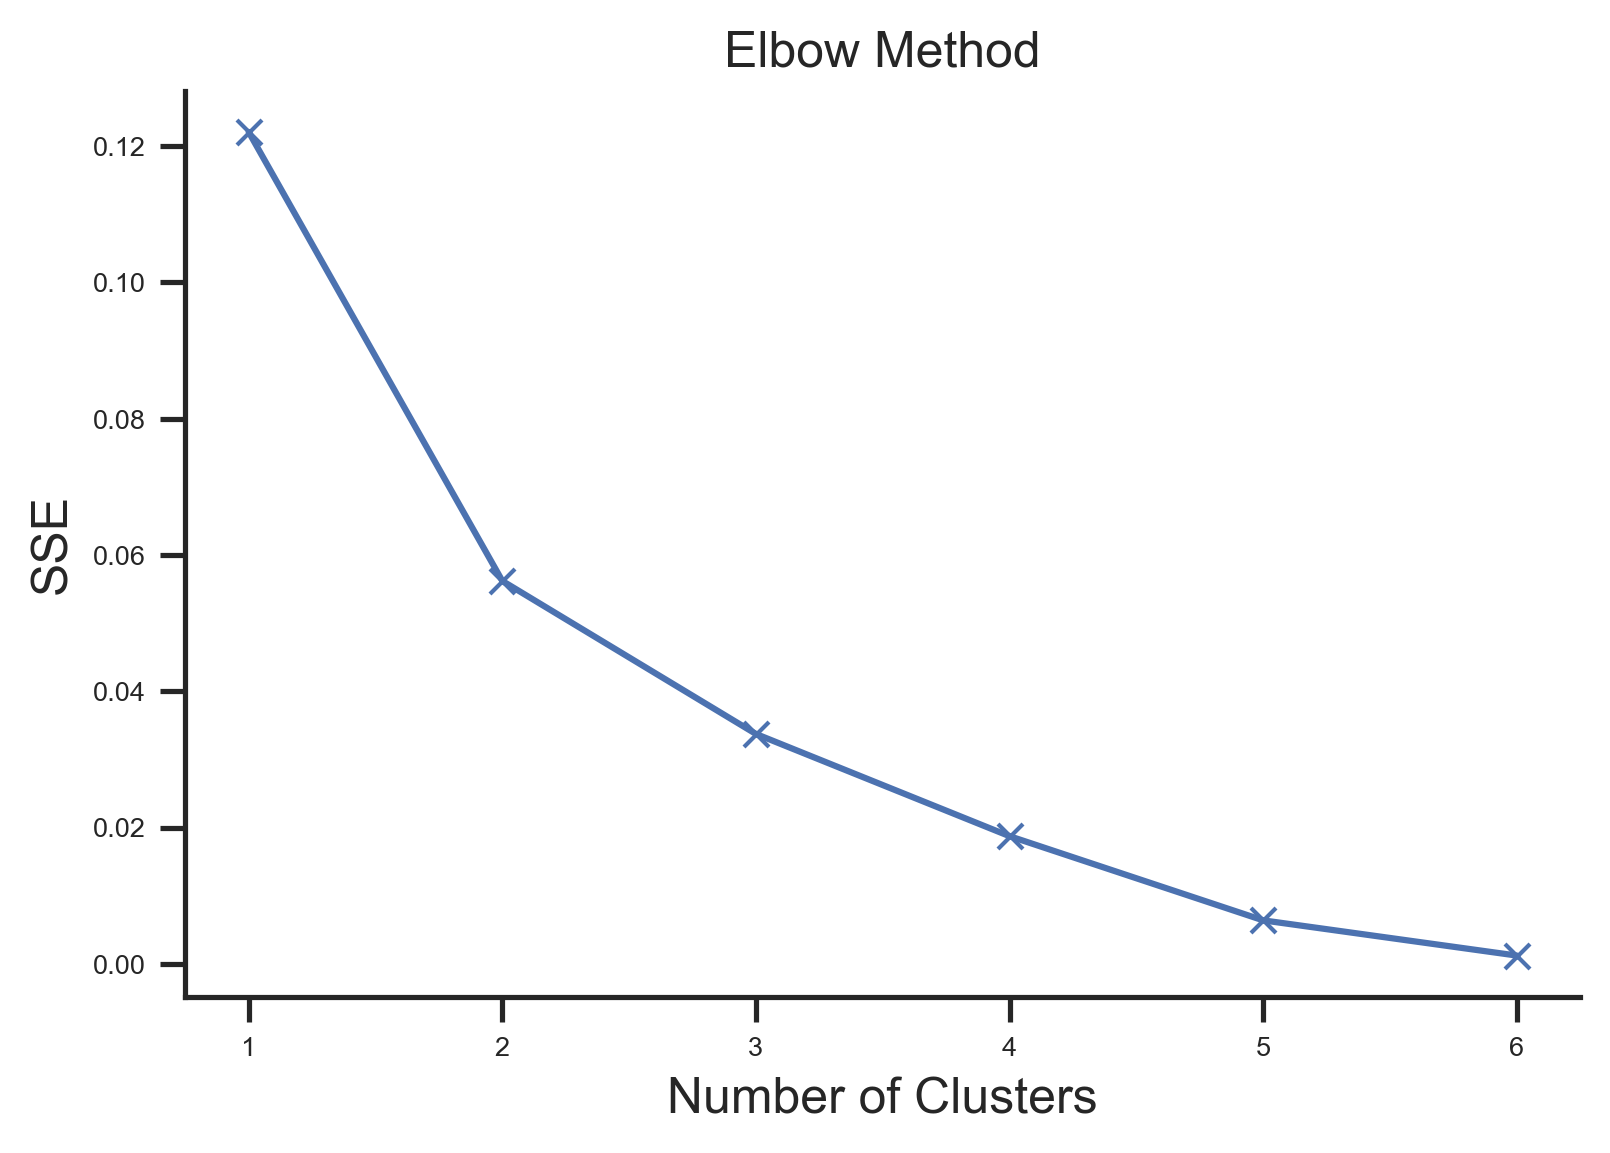

In [63]:
#Plot to identify the elbow for the SSE vs k curve
sns.set_theme(style="ticks", color_codes=True)

plt.plot(range(1, 7), sse, '-bx') 
plt.title('Elbow Method')
plt.xticks(range(1, 7), size=6.5)
plt.yticks(size=6.5)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
sns.despine()
plt.show()

In [64]:
from sklearn.metrics import silhouette_score
#Empty list to hold the silhouette coefficients for each k
silhouette_coefficients = []

#Loop for Kmeans for each K and obtain respective silhoutte coefficients
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(venues_to_cluster)
    score = silhouette_score(venues_to_cluster, kmeans.labels_)
    silhouette_coefficients.append(score)

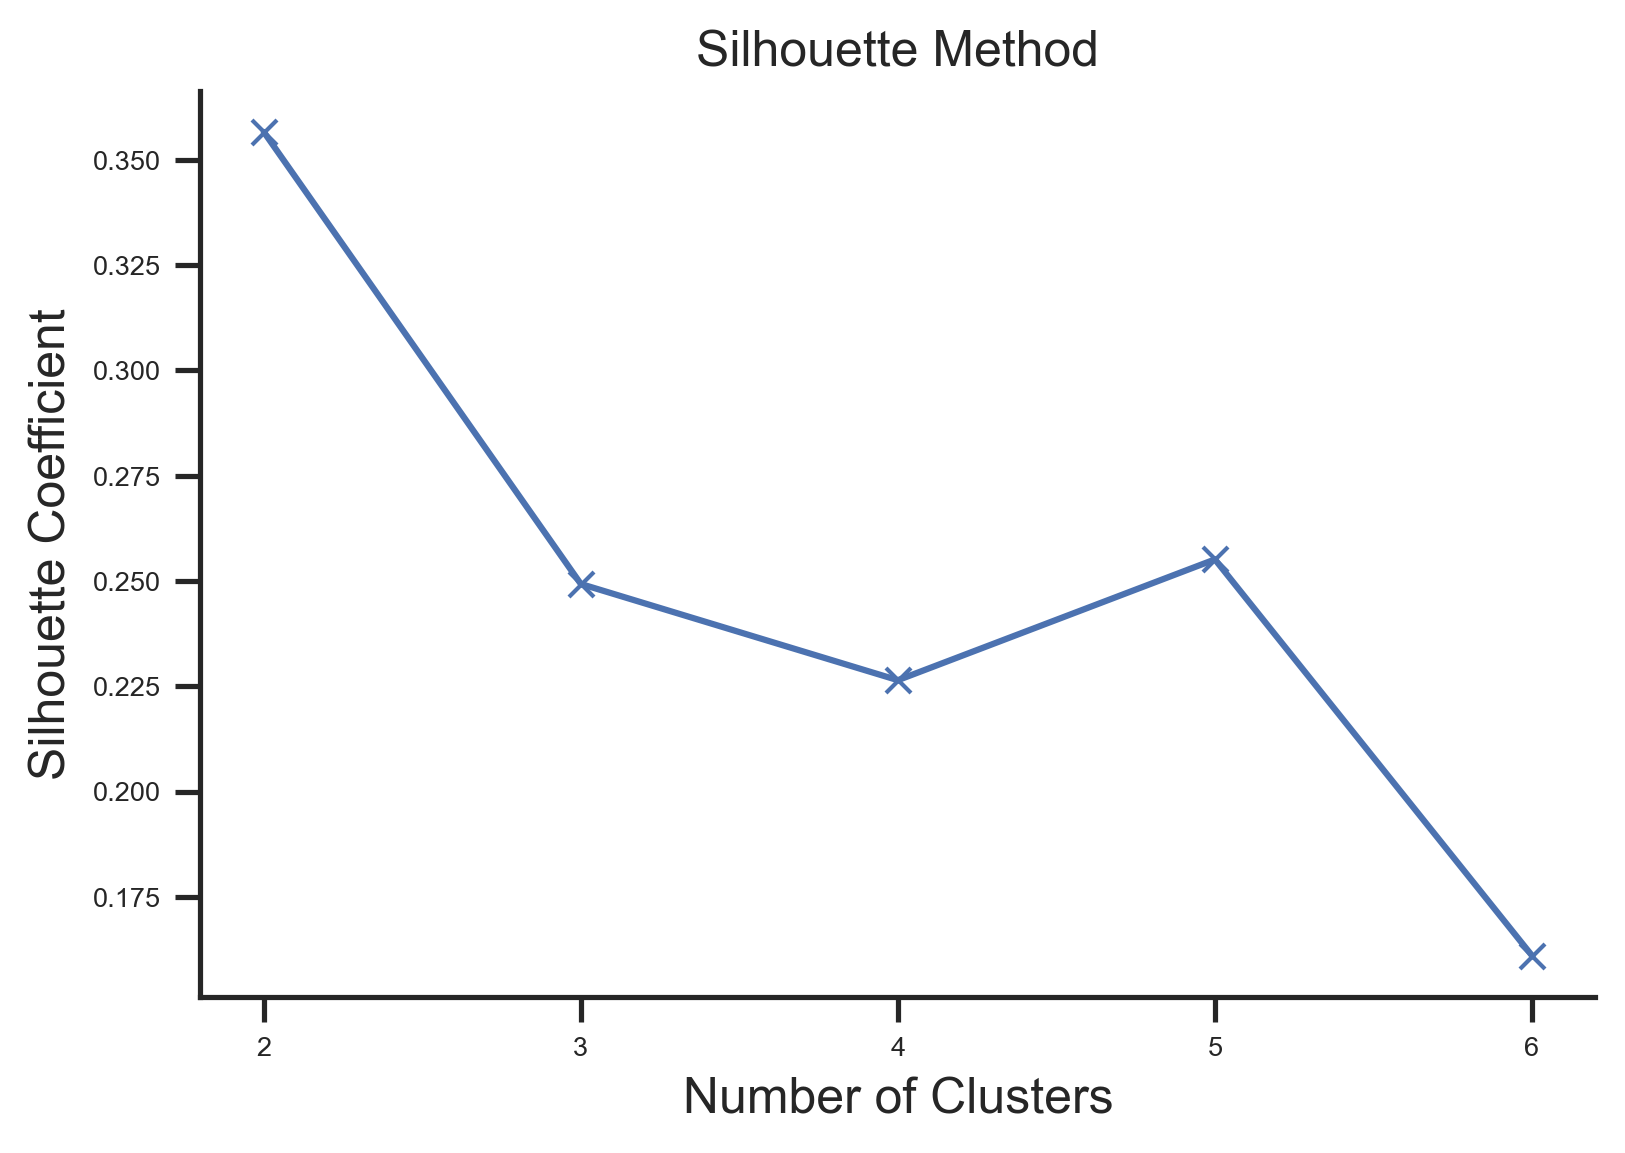

In [65]:
#Plot to identify the number of cluster with highest silhouhette coefficients
sns.set_theme(style="ticks", color_codes=True)

plt.plot(range(2, 7), silhouette_coefficients,'-bx')
plt.xticks(range(2, 7), size=6.5)
plt.yticks(size=6.5)
plt.title('Silhouette Method')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
sns.despine()

In [66]:
#Define parameters
kmeans_params = {
    "init": "k-means++",
    "n_init": 300,
    "max_iter": 1000,
    "random_state": 42,
}

#Specify number of clusters
kmeans = KMeans(n_clusters=2, **kmeans_params)

#Fit model
kmeans.fit(venues_to_cluster)

KMeans(max_iter=1000, n_clusters=2, n_init=300, random_state=42)

In [67]:
#Create cluster column
Venice_grouped.insert(1, 'Cluster', kmeans.labels_)

In [68]:
#Display Df
Venice_grouped

,Neighborhood,Cluster,Venue Category_American Restaurant,Venue Category_Asian Restaurant,Venue Category_Bakery,Venue Category_Bistro,Venue Category_Breakfast Spot,Venue Category_Cafeteria,Venue Category_Café,Venue Category_Chinese Restaurant,...,Venue Category_Fast Food Restaurant,Venue Category_Italian Restaurant,Venue Category_Kosher Restaurant,Venue Category_Middle Eastern Restaurant,Venue Category_Pizza Place,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Snack Place,Venue Category_Trattoria/Osteria,Venue Category_Vegetarian / Vegan Restaurant
0,Cannaregio,1,0.00,0.000000,0.024390,0.000000,0.000000,0.000000,0.048780,0.00,...,0.024390,0.560976,0.02439,0.04878,0.073171,0.073171,0.000000,0.048780,0.024390,0.000000
1,Castello,1,0.00,0.000000,0.053571,0.000000,0.000000,0.000000,0.196429,0.00,...,0.000000,0.589286,0.00000,0.00000,0.071429,0.035714,0.017857,0.000000,0.017857,0.000000
2,Dorsoduro,0,0.00,0.028571,0.057143,0.000000,0.000000,0.000000,0.228571,0.00,...,0.000000,0.514286,0.00000,0.00000,0.085714,0.028571,0.000000,0.028571,0.000000,0.028571
3,Giudecca,1,0.00,0.000000,0.071429,0.000000,0.071429,0.071429,0.071429,0.00,...,0.000000,0.642857,0.00000,0.00000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000
4,San Marco,1,0.01,0.000000,0.030000,0.000000,0.000000,0.000000,0.120000,0.01,...,0.010000,0.650000,0.00000,0.00000,0.060000,0.080000,0.000000,0.010000,0.010000,0.000000
5,San Polo,1,0.00,0.000000,0.052632,0.013158,0.000000,0.000000,0.118421,0.00,...,0.000000,0.657895,0.00000,0.00000,0.065789,0.052632,0.000000,0.026316,0.000000,0.000000
6,Santa Croce,0,0.00,0.018868,0.056604,0.018868,0.018868,0.018868,0.207547,0.00,...,0.056604,0.377358,0.00000,0.00000,0.056604,0.018868,0.018868,0.094340,0.018868,0.000000


In [69]:
#Allocate cluster to each entry in the Df

#Create empty list store results
x = []

#Loop for Neighboorhood in the Df
for neigh in Venice_venues.loc[:,'Neighborhood']:
    if neigh=='Dorsoduro' or  neigh=='Santa Croce':
        x.append(1)
        
    else:
        x.append(0)

#Insert newly-defined column 
Venice_venues.insert(1,'Cluster', x)

We are ready to explore our new clusters. Again, we start by visualizing them spatially on a __map__.

In [70]:
Venice_venues.head()

,Neighborhood,Cluster,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cannaregio,0,45.4437,12.3257,Trattoria Bar Pontini,45.443900,12.325231,Italian Restaurant
1,Cannaregio,0,45.4437,12.3257,Cicchetteria Venexiana Da Luca e Fred,45.443717,12.326224,Italian Restaurant
2,Cannaregio,0,45.4437,12.3257,Trattoria Alla Fontana,45.444533,12.324018,Italian Restaurant
3,Cannaregio,0,45.4437,12.3257,Trattoria Gigio,45.443746,12.327223,Trattoria/Osteria
4,Cannaregio,0,45.4437,12.3257,Anice Stellato,45.446280,12.328538,Italian Restaurant


In [71]:
#Create map object
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Venice_venues['Neighborhood Latitude'], Venice_venues['Neighborhood Longitude'], Venice_venues['Neighborhood'], Venice_venues['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

From the map above, we see that in this case there is __no clear spatial correlation__ between the cluster repartition and their distance from the city center. 

Now we proceed by exploring the two clusters individually. We will be doing so by extracting the __percentage of occurrence of each venue category within each cluster__ for the 10 most frequent categories. 

In [72]:
#Cluster 0 - Cannaregio, Dorsoduro, San Marco, San Polo, Santa Croce
Cluster_zero = (((Venice_venues[Venice_venues['Cluster'] == 0]
  .groupby('Venue Category').size().sort_values(ascending=False).head(10)) * 100) / \
    len(Venice_venues[Venice_venues['Cluster'] == 0])).to_frame().reset_index()

Cluster_zero.rename(columns={Cluster_zero.columns[1] : 'Percentage'}, inplace=True)

Cluster_zero.index += 1

In [73]:
Cluster_zero

,Venue Category,Percentage
1,Italian Restaurant,62.717770
2,Café,12.195122
3,Pizza Place,6.620209
4,Restaurant,5.923345
5,Bakery,4.181185
6,Snack Place,1.742160
7,Trattoria/Osteria,1.045296
8,Deli / Bodega,0.696864
9,Diner,0.696864
10,Fast Food Restaurant,0.696864


In [74]:
#Cluster 1 - Castello, Giudecca
Cluster_one = (((Venice_venues[Venice_venues['Cluster'] == 1]
  .groupby('Venue Category').size().sort_values(ascending=False).head(10)) * 100) / \
    len(Venice_venues[Venice_venues['Cluster'] == 1])).to_frame().reset_index()

Cluster_one.rename(columns={Cluster_one.columns[1] : 'Percentage'}, inplace=True)

Cluster_one.index += 1

In [75]:
Cluster_one

,Venue Category,Percentage
1,Italian Restaurant,43.181818
2,Café,21.590909
3,Snack Place,6.818182
4,Pizza Place,6.818182
5,Bakery,5.681818
6,Fast Food Restaurant,3.409091
7,Restaurant,2.272727
8,Asian Restaurant,2.272727
9,Vegetarian / Vegan Restaurant,1.136364
10,Trattoria/Osteria,1.136364


We then decide to display the top __10 most recurring categories for each cluster__ by using a __bar plot__. 

In [76]:
#Define axis content
x1 = Cluster_zero['Venue Category']
y1 = Cluster_zero['Percentage']
x2 = Cluster_one['Venue Category']
y2 = Cluster_one['Percentage']

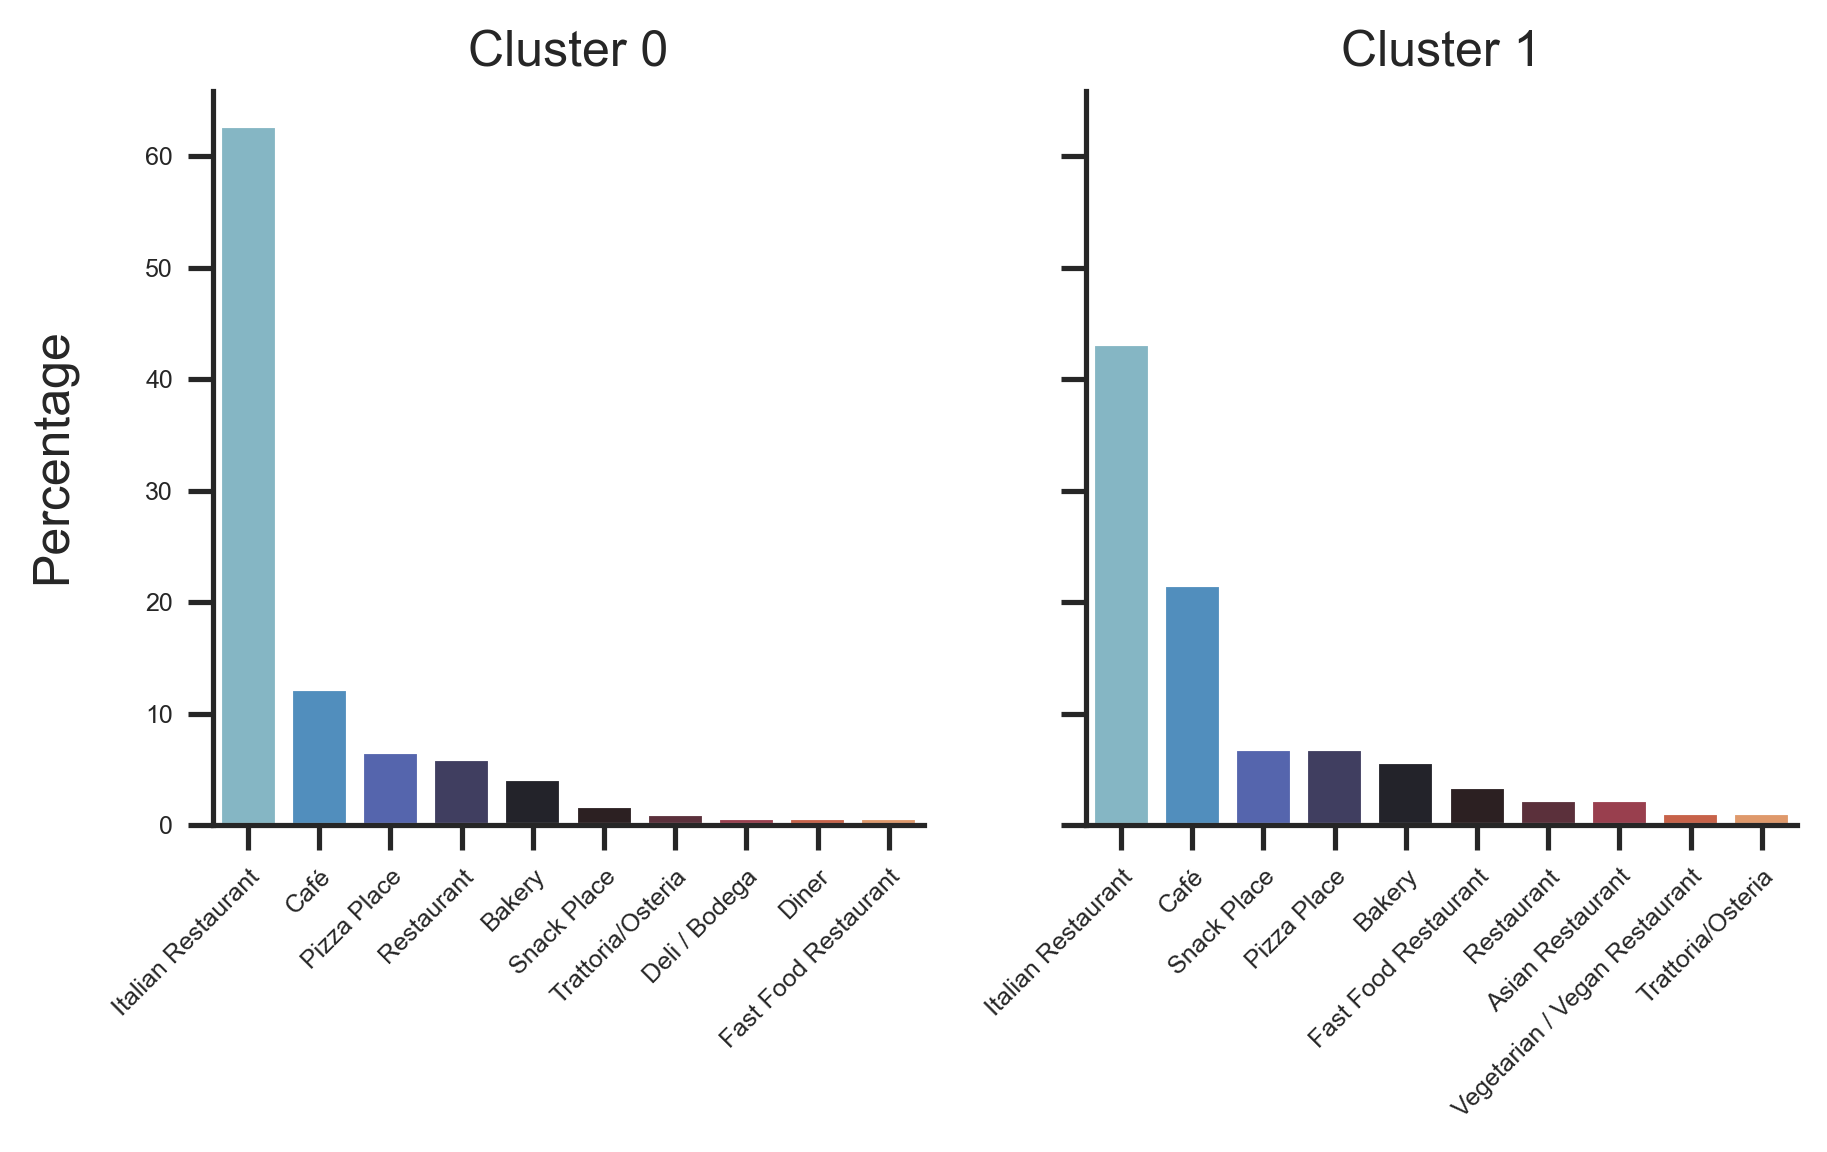

In [77]:
#Barchart with 2 subplots - one for each neighborhood

fig, axes = plt.subplots(1, 2, sharey=True)
fig.text(0.001, 0.6, 'Percentage', ha='center', va='center', rotation='vertical')

#Cluster 0
fig1 = sns.barplot(y=y1, x=x1, ax=axes[0], palette=sns.color_palette("icefire", 10))
fig1.set(xlabel=None, ylabel=None)
fig1.title.set_text('Cluster 0')
fig1.tick_params(axis='both', which='major', labelsize=6)
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#Cluster 1
fig2 = sns.barplot(y=y2, x=x2, ax=axes[1], palette=sns.color_palette("icefire", 10))
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fig2.set(xlabel=None, ylabel=None)
fig2.title.set_text('Cluster 1')
fig2.tick_params(axis='both', which='major', labelsize=6)

#Tight layout 
fig.tight_layout()


#Despine axes
sns.despine()

From the plot displayed above, we can see that both clusters share the first and second most frequent categories, namely Italian Restaurant and Café.

However, __Cluster 0 has a much more defined identity__, with more than 60% of the venues belonging to the category Italian Restaurant, while in Cluster 1's categories seem to be more proportionally distributed. 

The can visualize this more clearly using a __line plot__ as follows. 

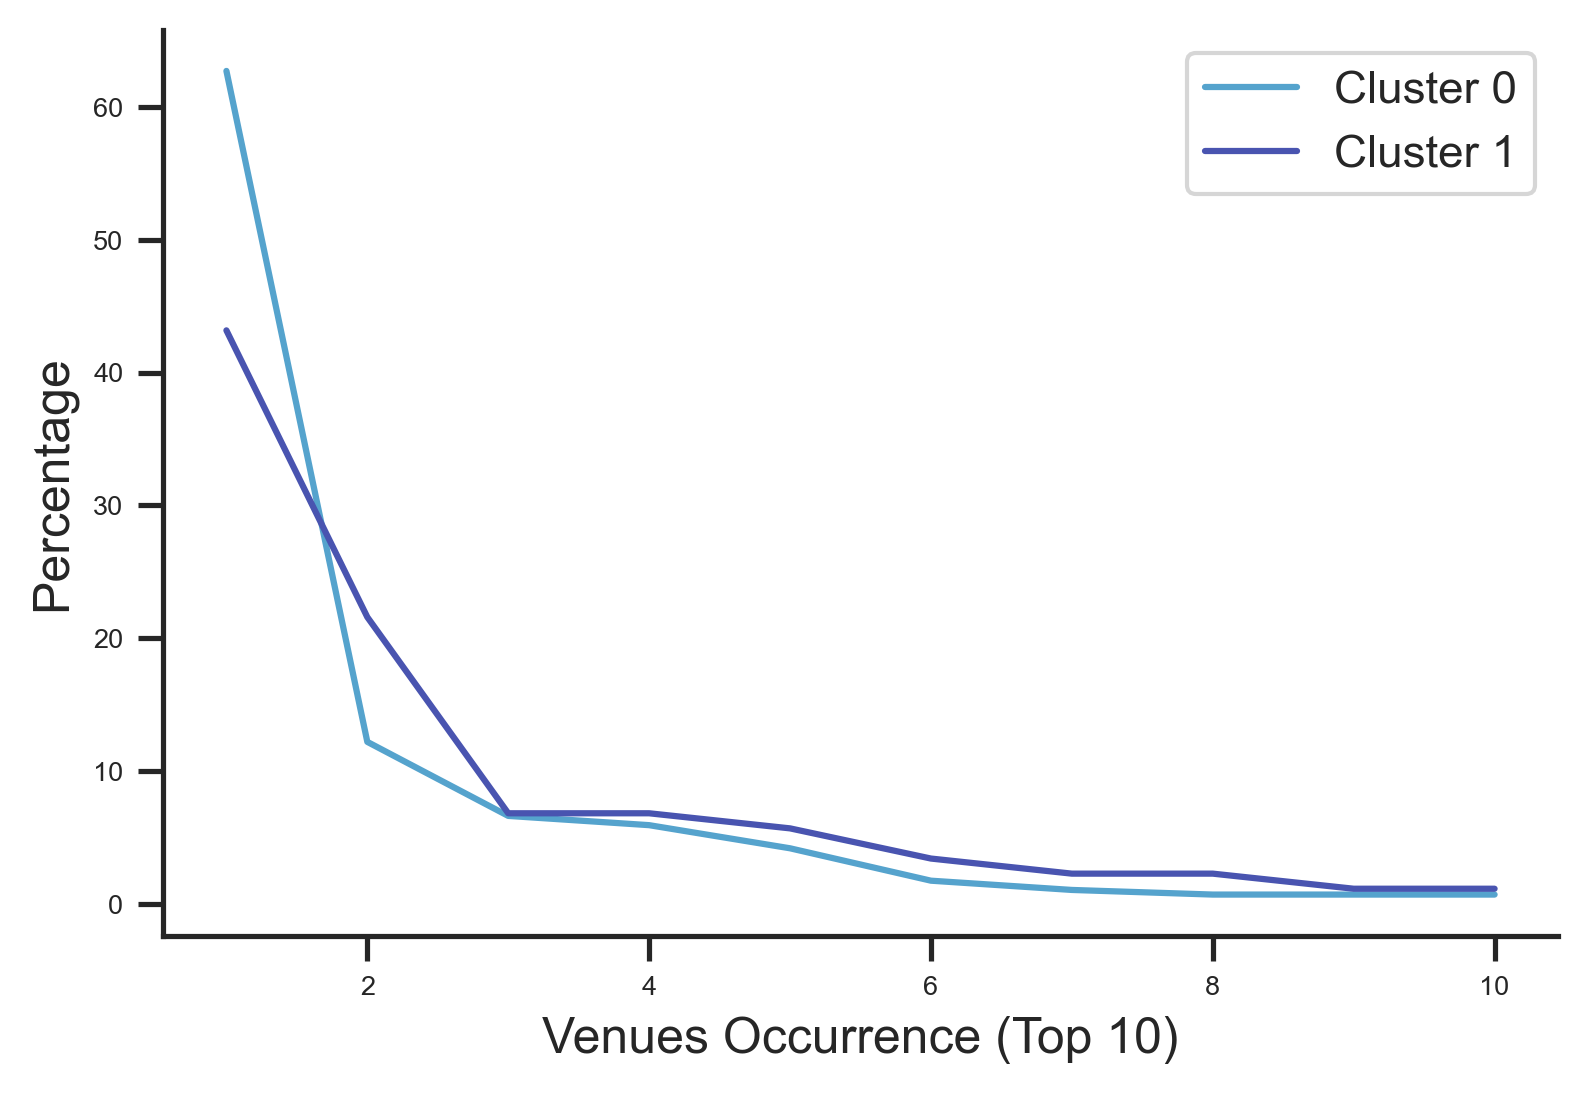

In [78]:
#Set color palette
sns.set_palette("icefire")

#Creare axes
ax = Cluster_zero.plot()
sns.despine()
#Create plot
Cluster_one.plot(ax=ax)

ax.tick_params(axis='both', labelsize=6.5)

#Define labels
plt.ylabel('Percentage')
plt.xlabel('Venues Occurrence (Top 10)')

#Define legend
plt.legend(loc='upper right', labels=['Cluster 0', 'Cluster 1'])

### Further Analysis 

The __lack of diversity in Cluster 0 makes it a good candidate for our Restaurant__, since it will be easier to choose Restaurant category which is currently under-represented in the neighborhoods belonging to Cluster 0. In other words, especially considering that Cluster 0 is both bigger and contains more central neighborhoods than Cluster 1, our assumption is that __any category of restaurant which is not Italian Restaurant will be meet customers diversified demand more easily__ than it would do in the more diverse Cluster 1 - where Restaurants from belonging to other categories are much more numerous. 

We then __select Cluster 0__ and proceed with our analysis.

In [79]:
#Get Neighborhoods in Cluster 0
Venice_venues[Venice_venues['Cluster'] == 0].Neighborhood.unique()

array(['Cannaregio', 'Castello', 'Giudecca', 'San Marco', 'San Polo'],
      dtype=object)

By doing so, we have restricted our analysis to five neighborhoods: Cannaregio, Castello, Giudecca, San Marco, San Polo. 

Now, we could carry on clustering the remaining neighborhoods, but considering that neighborhoods, to a certain extent, represent cluster in themselves, we decide to refer to our initial condition, namely that of choosing an area with a __balanced proportion of travelers and residents__. This will allow our restaurant to be profitable even in the light of the current crisis vexing the travel industry. 

We thereby refer to the data frame we have previously defined, Venice_population, and, considering the remaining neighborhoods were originally clustered together on the basis of their popularity among tourists, we will limiting ourselves to select the __most populated one__. 

In [80]:
#Filter remaining neighborhoods in Venice_population
Venice_final = Venice_population[Venice_population['Neighborhood']
                  .isin(['Cannaregio', 'Castello', 'Giudecca', 'San Marco', 'San Polo'])]

In [81]:
#Reset index
Venice_final.reset_index(drop=True, inplace=True)

In [82]:
#Sort neighborhoods on the basis of population figure
Venice_final.sort_values(by='Population', ascending=False)[['Neighborhood', 'Population']]

,Neighborhood,Population
0,Cannaregio,15662
1,Castello,11642
4,San Polo,4628
2,Giudecca,4481
3,San Marco,3788


In [83]:
#Display neighborhoods average population
Venice_final['Population'].mean()

8040.2

In [84]:
pop = Venice_final.sort_values(by='Population', ascending=False)[['Neighborhood', 'Population']]

We see that the __most populated neighborhood in our cluster is Cannaregio__, with a population density way above the average - and 4020 above the second most populated neighborhood Castello. 

Thus, we are more then prone to select Cannareggio as the ideal neighborhood for our restaurant. However, since Castello's population is twice as bigger as than that of the other remaining neighborhoods, we decide to confirm our selection by __cross-referencing population figures with data regarding the rental cost within each neighborhood__. 

We scrape this data directly from the web. 

In [85]:
#Define url
url3 = 'https://www.mercato-immobiliare.info/veneto/venezia/venezia/quotazione-locale-commerciale.html'

In [86]:
#Select table
rents = pd.read_html(url3)[0]

In [87]:
#Select only useful columns
rents.drop(rents.columns[[0, 2, 5]], axis=1, inplace=True)

In [88]:
#Rename columns - translating from Italian to English
rents = rents.rename(columns={'zona':'Neighborhood', 'affitto':'Monthly_price_m2', 'annunci':'For_rent'})

In [89]:
#Clean columns strings
rents['Neighborhood'] = rents.iloc[:,0].str.replace('Sestiere ', '')

rents['Monthly_price_m2'] = rents.iloc[:, 1].str.replace('€', '').str.replace('/m²/mese', '').str.replace(',','.')

rents['Monthly_price_m2'] = pd.to_numeric(rents['Monthly_price_m2'], downcast="float")

In [90]:
#Select only remaining neighborhood from the selected cluster
rents[rents['Neighborhood'].isin(['Cannaregio', 'Castello', 'Giudecca', 'San Marco', 'San Polo'])].sort_values(by='Monthly_price_m2')

,Neighborhood,Monthly_price_m2,For_rent
1,Giudecca,29.500000,30+
3,Cannaregio,30.700001,~100
7,San Polo,34.700001,~100
6,San Marco,35.400002,~100
4,Castello,40.500000,50+


From the table displayed above we can see that Cannaregio is also one where rental rate for commercial activities is also rather low - and by far cheaper than in Castello, the second most populated neighborhood.

We then confirm our choice and select Cannaregio as the most suitable neighborhood for our restaurant.

But which typology of restaurant would be an optimal choice? We opt for leaving the definitive decision to the stakeholders, since there are many an more complex factors to consider - some of which, even personal - and to which we currently cannot have access to.

However, we decide to put stakeholders in the best position to choose and thereby provide them with __visual description of the categories of the existing food services in Cannaregio__, which will be useful in guiding their investment strategy.

In [91]:
#Visualize categories and order them by occurrence
Venice_venues[Venice_venues['Neighborhood'] == 'Cannaregio'].groupby('Venue Category').size().sort_values(ascending=False)

Venue Category
Italian Restaurant           23
Restaurant                    3
Pizza Place                   3
Snack Place                   2
Middle Eastern Restaurant     2
Café                          2
Trattoria/Osteria             1
Kosher Restaurant             1
Fast Food Restaurant          1
Deli / Bodega                 1
Creperie                      1
Bakery                        1
dtype: int64

In [92]:
#Define Cannareigo Df
Cannaregio = Venice_venues[Venice_venues['Neighborhood'] == 'Cannaregio'].groupby('Venue Category').size().sort_values(ascending=True).to_frame()

In [93]:
#Define axes content for plotting
y = Cannaregio.iloc[:,0]
x = Cannaregio.index

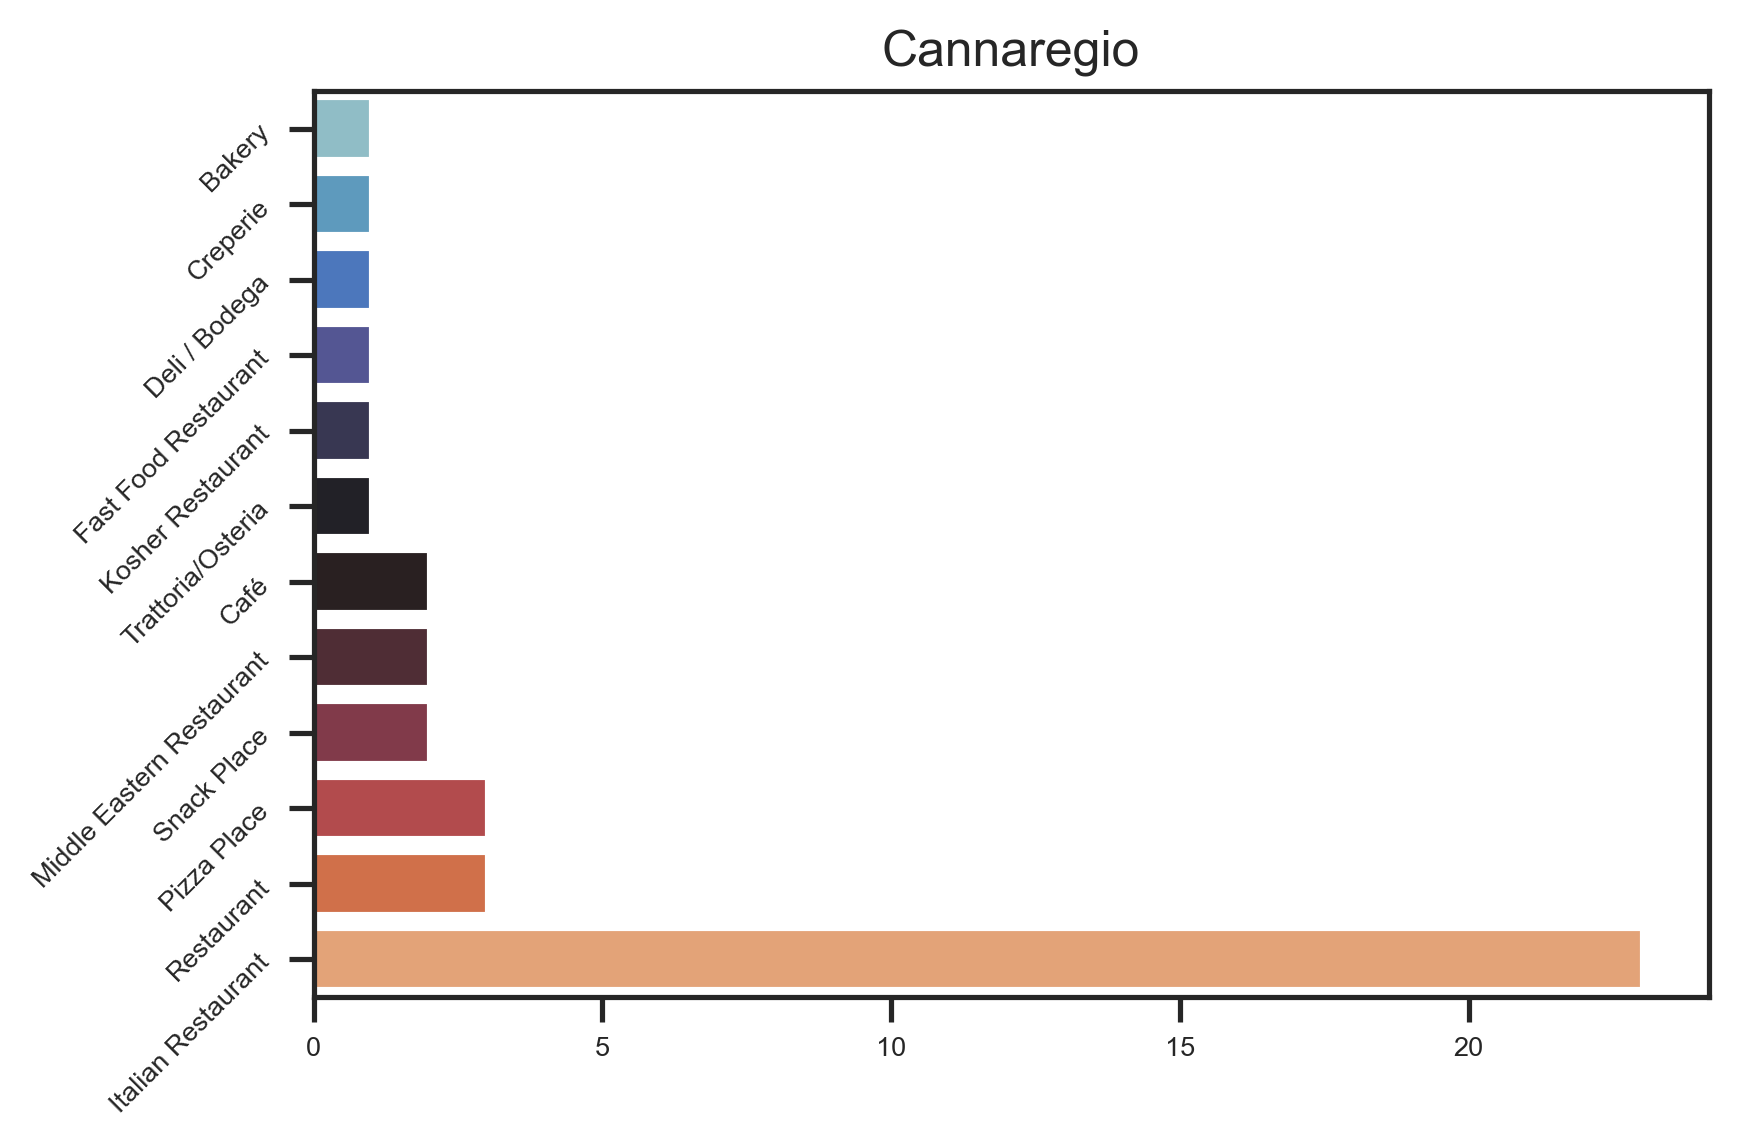

In [94]:
#Plot parameters 
fig, axes = plt.subplots()

#Plot figure
fig = sns.barplot(y=x, x=y, ax=axes, palette=sns.color_palette("icefire", 12))
axes.tick_params(axis='y', rotation=45, labelsize=6.5)
axes.tick_params(axis='x', labelsize=6.5)
fig.set(xlabel=None, ylabel=None)
fig.title.set_text('Cannaregio')



From the plot displayed above, stakeholders would ideally be able to draw their own conclusions and, accordingly,  chose the most pertinent typology of restaurant to invest in. Our own suggestion, which directed our analytical approach, would be that of __choosing a category which is highly under-represented__ - if not throughly absent - in the graph. Considering the very diverse demand of our potential customers - both residents and visitors from all over the world - this might reveal to be the optimal strategy. 

On a quick note, stakeholders should bear in mind that data regarding the aforementioned venue categories was obtained using the free access _Foursquare_ Sandbox Tier Accounts, which is limits the number of entries displayed. This implies that our description of the neighborhood of Cannaregio should be taken only as reference, which, despite providing a realistic account of the distribution of its top food services, necessarily left out an indefinite number of restaurants. Stakeholders should be thereby be cautious in drawing conclusions such as "there is no Asian Restaurant in the neighborhood of Cannaregio". The data we visualize simply state that no Asian Restaurant is in the best 50 rated food services in the area of Cannareggio - as reported in _Foursquare_